<a href="https://colab.research.google.com/github/deepakkollala/CE888_Labs/blob/main/lab3/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix , classification_report, f1_score
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

**Load the data from bank-additional-full.csv**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**No of features**

In [ ]:
len(df.columns) -1

20

#  Data preprocessing

**Check null values**

In [ ]:
df.isnull().sum().sort_values(ascending=False)

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64

**Use LabelEncoder to convert the label into numbers.**

In [ ]:
# Apply labelencoder to Target variable
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)

**Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df)**


In [ ]:
df_dummies = pd.get_dummies(df)

**Column "duration" must be deleted**

In [ ]:
df_dummies.drop(columns='duration',inplace=True)

**Check if there are any missing values in the dataset. If there are, drop the rows.**


In [ ]:
print("Number of rows before dropping NaNs: %d" % len(df_dummies))
df_dummies = df_dummies.dropna()
print("Number of rows after dropping NaNs: %d" % len(df_dummies))

Number of rows before dropping NaNs: 41188
Number of rows after dropping NaNs: 41188


**Plot histogram of the label and calculate the imbalance in the dataset.**

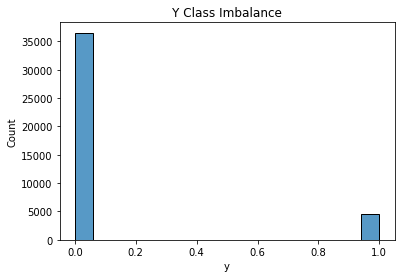

In [ ]:
sns_plot = sns.histplot(df_dummies.y, kde=False).set_title('Y Class Imbalance')

# Let's model the data:

**Using the train_test_split function in scikit-learn, separate your dataset into a training and a test set, with a test size of 20% and random_state=50. Make sure the train/test split is stratified (and check that it is!). Stratified means that the percentages of classes in each fold remains constant.**

In [ ]:
y = df_dummies[['y']]
X = df_dummies.drop(columns='y')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = .2, random_state=50, stratify=y.y)

Stratified Train Test Split

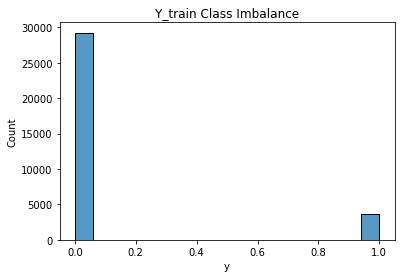

In [ ]:
sns_plot = sns.histplot(Y_train.y, kde=False).set_title('Y_train Class Imbalance')

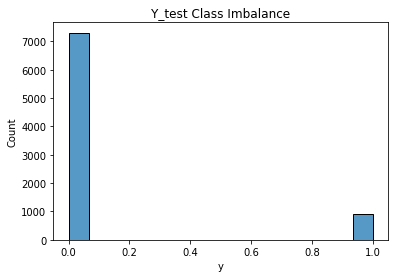

In [ ]:
sns_plot = sns.histplot(Y_test.y, kde=False).set_title('Y_test Class Imbalance')

**Report the results of 10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3. Ensure you're using an appropriate metric (Use sorted(sklearn.metrics.SCORERS.keys()) to see what are the valid options).**

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3,verbose=False)

skf = StratifiedKFold(n_splits=10)
f1scores = cross_val_score(clf, X_train, Y_train.values.ravel(), cv=skf, scoring="f1",verbose=False) 
print("F1 Score: %.2f +/- %.2f" % (f1scores.mean(), f1scores.std()))

RandomForestClassifierScore = f1scores.mean()

F1 Score: 0.25 +/- 0.05


**Compare the results of your classifier with that of a dummy classifier.**

In [ ]:
dummy_classifier = DummyClassifier(strategy="stratified")

skf = StratifiedKFold(n_splits=10)
f1scores = cross_val_score(dummy_classifier, X_train, Y_train, cv=skf, scoring="f1",verbose=False) 
print("F1 Score: %.2f +/- %.2f" % (f1scores.mean(), f1scores.std()))

DummyClassifierScore = f1scores.mean()


F1 Score: 0.11 +/- 0.01


**Compare the results of your classifier with that of a dummy classifier.**

In [ ]:
list_cls =[]
list_scr = []

list_cls.append('RandomForest Classifier')
list_cls.append('Dummy Classifier')

list_scr.append(RandomForestClassifierScore)
list_scr.append(DummyClassifierScore)

# dictionary of lists 
dict = {'Classifier': list_cls, 'Score': list_scr} 
    
dfscore = pd.DataFrame(dict)
print('Comparing results of both classifiers:')    
dfscore

Comparing results of both classifiers:


,Classifier,Score
0,RandomForest Classifier,0.246730
1,Dummy Classifier,0.113153


**Use GridSearchCV to find a better set of parameters for your random forest.**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [100,400,700],
    'max_features': ['auto', 'sqrt', 'log2']
}

clf = RandomForestClassifier()
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)


skf = StratifiedKFold(n_splits=5)
f1scores = cross_val_score(CV_clf, X_train, Y_train.values.ravel(), cv=skf, scoring="f1",verbose=False) 
print("F1 Score: %.2f +/- %.2f" % (f1scores.mean(), f1scores.std()))

GridSearchCVScore = f1scores.mean()






F1 Score: 0.37 +/- 0.02


**Print the cross-validation metric (whichever you previously chose) that you obtain for the random forest for the best parameters found with GridSearchCV**

In [ ]:
list_cls =[]
list_scr = []

list_cls.append('RandomForest Classifier')
list_cls.append('Dummy Classifier')
list_cls.append('GridsearchCV')

list_scr.append(RandomForestClassifierScore)
list_scr.append(DummyClassifierScore)
list_scr.append(GridSearchCVScore)

# dictionary of lists 
dict = {'Classifiers': list_cls, 'Score': list_scr} 
    
df = pd.DataFrame(dict)
print('Comparing results of all classifiers:')    
df 

Comparing results of all classifiers:


,Classifiers,Score
0,RandomForest Classifier,0.246730
1,Dummy Classifier,0.113153
2,GridsearchCV,0.370870


**What are the top 3 features?**


In [ ]:
import numpy as np
CV_clf.fit(X_train, Y_train.values.ravel())
importances = CV_clf.best_estimator_.feature_importances_


In [ ]:
std = np.std([CV_clf.best_estimator_.feature_importances_ for tree in CV_clf.best_estimator_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

In [ ]:
features =[]
for cl in X_train.columns:
  features.append(cl)


In [22]:
# Print the feature ranking
print("Feature ranking:")

for f in range(3):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

Feature ranking:
1. age (0.160247)
2. euribor3m (0.119554)
3. campaign (0.080604)


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.title("Top 3 Features importances")
plt.bar(range(3), importances[indices][0:3],
       color="r", yerr=std[indices][0:3], align="center")
plt.xticks(range(3), np.array(features)[indices])
plt.xlim([-1,3])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

**Report the generalisation error (still using the same metric) on your test set.**


In [24]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3,verbose=False)
#scores = cross_val_score(clf, X, y, cv=10,scoring='r2')

skf = StratifiedKFold(n_splits=10)
f1scores = cross_val_score(clf, X_test, Y_test.values.ravel(), cv=skf, scoring="f1",verbose=False) 
print("F1 Score: %.2f +/- %.2f" % (f1scores.mean(), f1scores.std()))

RandomForestClassifierScore = f1scores.mean()

F1 Score: 0.28 +/- 0.06
